# Predicting if Income Exceeds 50,000US dollars per year
#### The dataset is credited to Ronny Kohavi and Barry Becker and was drawn from the 1994 United States Census Bureau data and involves using personal details such as education level to predict whether an individual will earn more or less than $50,000 per year.




### Python Capstone by Mabel Barba


## I Data Collection

In [253]:
import numpy as np # Python linear algebra library
import pandas as pd # Python data processing library 

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from pandas.plotting import scatter_matrix
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown(string))
#A Counter is a dict subclass for counting hashable objects. It is a collection where elements are stored as dictionary keys and their counts are stored as dictionary values. Counts are allowed to be any integer value including zero or negative counts. 
#the Counter class is similar to bags or multisets in other languages.
from collections import Counter 

# Classification Algorithms
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, accuracy_score,f1_score

# Import scikit_learn module to split the dataset into train.test sub-datasets
from sklearn.model_selection import train_test_split 
# Import scikit_learn module for k-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import sklearn.tree as tree

# import the metrics class
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize

# import stats for accuracy 
import statsmodels.api as sm

import statsmodels as sm
import sklearn as skl
import sklearn.preprocessing as preprocessing

from sklearn import svm
from sklearn import tree

In [254]:
#Column names
col_Names=["Age", "Workclass", "Fnlwgt","Education", "EducationNum", "Marital", "Occupation", "Relationship", "Race", "Sex", "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"]

#Importing file
#Missing values detected
census = pd.read_csv("census.txt", sep=',\s+', delimiter=',', encoding="utf-8", skipinitialspace=True, header=None, names=col_Names, na_values=["?"])

census.head(3)             

,Age,Workclass,Fnlwgt,Education,EducationNum,Marital,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [255]:
# Data set info
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            48842 non-null  int64 
 1   Workclass      46043 non-null  object
 2   Fnlwgt         48842 non-null  int64 
 3   Education      48842 non-null  object
 4   EducationNum   48842 non-null  int64 
 5   Marital        48842 non-null  object
 6   Occupation     46033 non-null  object
 7   Relationship   48842 non-null  object
 8   Race           48842 non-null  object
 9   Sex            48842 non-null  object
 10  CapitalGain    48842 non-null  int64 
 11  CapitalLoss    48842 non-null  int64 
 12  HoursPerWeek   48842 non-null  int64 
 13  NativeCountry  47985 non-null  object
 14  Income         48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [256]:
# Total number of records
n_records = census.shape[0]

# Total number of features
n_features = census.shape[1]

# Number of records where individual's income is more than $50,000
n_greater_50k = census[census['Income'] == '<=50K'].shape[0]

# Number of records where individual's income is at most $50,000
n_at_most_50k = census[census['Income'] == '>50K'].shape[0]

# Percentage of individuals whose income is more than $50,000
greater_percent =  (n_greater_50k / n_records) * 100

# Print the results
print("Total number of records: {}".format(n_records))
print("Total number of features: {}".format(n_features))
print("Individuals making more than $50k: {}".format(n_greater_50k))
print("Individuals making at most $50k: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50k: {:.2f}%".format(greater_percent))

Total number of records: 48842
Total number of features: 15
Individuals making more than $50k: 37155
Individuals making at most $50k: 11687
Percentage of individuals making more than $50k: 76.07%


In [257]:
# Confirming there are no "?"
census.Workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: Workclass, dtype: int64

## II Preliminary Data Exploration & Preparation

In [258]:
#Dataset Dimension
census.shape

(48842, 15)

In [259]:
#Statistics
census.describe()

,Age,Fnlwgt,EducationNum,CapitalGain,CapitalLoss,HoursPerWeek
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [260]:
# Data set info
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            48842 non-null  int64 
 1   Workclass      46043 non-null  object
 2   Fnlwgt         48842 non-null  int64 
 3   Education      48842 non-null  object
 4   EducationNum   48842 non-null  int64 
 5   Marital        48842 non-null  object
 6   Occupation     46033 non-null  object
 7   Relationship   48842 non-null  object
 8   Race           48842 non-null  object
 9   Sex            48842 non-null  object
 10  CapitalGain    48842 non-null  int64 
 11  CapitalLoss    48842 non-null  int64 
 12  HoursPerWeek   48842 non-null  int64 
 13  NativeCountry  47985 non-null  object
 14  Income         48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [261]:
# Check for Null Data
census.isnull().sum()

Age                 0
Workclass        2799
Fnlwgt              0
Education           0
EducationNum        0
Marital             0
Occupation       2809
Relationship        0
Race                0
Sex                 0
CapitalGain         0
CapitalLoss         0
HoursPerWeek        0
NativeCountry     857
Income              0
dtype: int64

In [262]:
duplicateRowsDF=census[census.duplicated()]
print("Duplicated rows except first occurence based on all columns are:")
print(duplicateRowsDF)

Duplicated rows except first occurence based on all columns are:
       Age         Workclass  Fnlwgt     Education  EducationNum  \
4881    25           Private  308144     Bachelors            13   
5104    90           Private   52386  Some-college            10   
9171    21           Private  250051  Some-college            10   
11631   20           Private  107658  Some-college            10   
13084   25           Private  195994       1st-4th             2   
15059   21           Private  243368     Preschool             1   
17040   46           Private  173243       HS-grad             9   
18555   30           Private  144593       HS-grad             9   
18698   19           Private   97261       HS-grad             9   
21318   19           Private  138153  Some-college            10   
21490   19           Private  146679  Some-college            10   
21875   49           Private   31267       7th-8th             4   
22300   25           Private  195994       1st-4th 

In [263]:
# There are 52 duplicate rows
duplicateRowsDF.shape

(52, 15)

In [264]:
duplicateRowsDF=census[census.duplicated()]
print("Duplicated rows except first occurence based on all columns are:")
print(duplicateRowsDF)

Duplicated rows except first occurence based on all columns are:
       Age         Workclass  Fnlwgt     Education  EducationNum  \
4881    25           Private  308144     Bachelors            13   
5104    90           Private   52386  Some-college            10   
9171    21           Private  250051  Some-college            10   
11631   20           Private  107658  Some-college            10   
13084   25           Private  195994       1st-4th             2   
15059   21           Private  243368     Preschool             1   
17040   46           Private  173243       HS-grad             9   
18555   30           Private  144593       HS-grad             9   
18698   19           Private   97261       HS-grad             9   
21318   19           Private  138153  Some-college            10   
21490   19           Private  146679  Some-college            10   
21875   49           Private   31267       7th-8th             4   
22300   25           Private  195994       1st-4th 

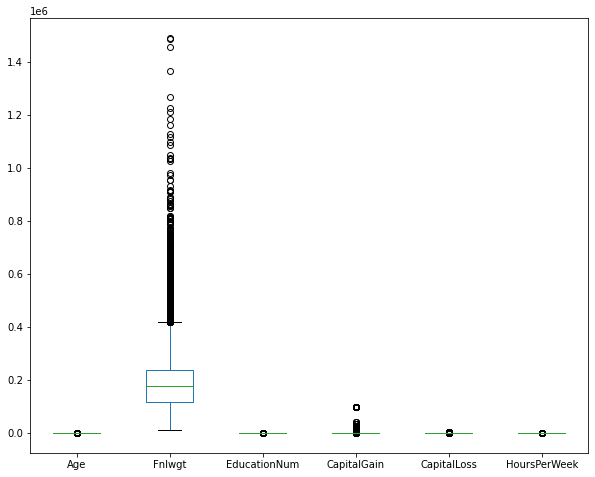

In [265]:
# Outliers
census.select_dtypes(exclude = 'category').plot(kind = 'box', figsize = (10,8))

# III Feature Engineering

In [266]:
#Encoding for ML section
newcol=pd.get_dummies(census['Income'])
census=pd.concat([census,newcol],axis=1)
#census.drop(['Income'],axis=1,inplace=True)
census.head(10)

,Age,Workclass,Fnlwgt,Education,EducationNum,Marital,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income,<=50K,>50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,1,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,1,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,0,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,0,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,0,1


In [267]:
#Rename columns
census = census.rename({'<=50K': 'LessEqualThan50', '>50K': 'MoreThan50'}, axis=1) 
census.head(2)

,Age,Workclass,Fnlwgt,Education,EducationNum,Marital,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income,LessEqualThan50,MoreThan50
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1,0


In [268]:
#Encoding column Sex for ML section
newcol=pd.get_dummies(census['Sex'])
census=pd.concat([census,newcol],axis=1)
#census.drop(['Sex'],axis=1,inplace=True)
census.head(10)

,Age,Workclass,Fnlwgt,Education,EducationNum,Marital,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income,LessEqualThan50,MoreThan50,Female,Male
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1,0,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1,0,0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,0,0,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1,0,0,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1,0,1,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,1,0,1,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,1,0,1,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,0,1,0,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,0,1,1,0
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,0,1,0,1


In [269]:
#Unique values, not including missing data
census.nunique() 

Age                   74
Workclass              8
Fnlwgt             28523
Education             16
EducationNum          16
Marital                7
Occupation            14
Relationship           6
Race                   5
Sex                    2
CapitalGain          123
CapitalLoss           99
HoursPerWeek          96
NativeCountry         41
Income                 2
LessEqualThan50        2
MoreThan50             2
Female                 2
Male                   2
dtype: int64

In [270]:
# Running a loop of value_counts of each column to find out unique values. 
for c in census.columns:
    print ("---- %s ---" % c)
    print (census[c].value_counts())

---- Age ---
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: Age, Length: 74, dtype: int64
---- Workclass ---
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: Workclass, dtype: int64
---- Fnlwgt ---
203488    21
120277    19
190290    19
125892    18
126569    18
          ..
170272     1
137444     1
172327     1
111368     1
208174     1
Name: Fnlwgt, Length: 28523, dtype: int64
---- Education ---
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
N

In [271]:
census.shape

(48842, 19)

In [272]:
# Dropping based on uniqueness of data from the dataset
# Education is already represented with EducationNum
# Fnlwgt is represented by Race, Age, Sex 
# Relationship is represented with Marital status

census.drop(['Education', 'Fnlwgt','Marital'], axis=1, inplace=True)

In [273]:
census.shape

(48842, 16)

### Missing Values

In [274]:
#Any missing data detected? T or F
census.isnull().values.any()

True

In [275]:
#Missing values per attribute
census.isnull().sum(axis=0)

Age                   0
Workclass          2799
EducationNum          0
Occupation         2809
Relationship          0
Race                  0
Sex                   0
CapitalGain           0
CapitalLoss           0
HoursPerWeek          0
NativeCountry       857
Income                0
LessEqualThan50       0
MoreThan50            0
Female                0
Male                  0
dtype: int64

In [276]:
# Total number of missing values
census.isnull().sum().sum()

6465

In [277]:
# drop rows with missing
census = census.dropna()

In [278]:
# Updated Census dataset
census.isnull().sum().sum()

0

In [279]:
# Missing values per attribute
census.isnull().sum(axis=0)

Age                0
Workclass          0
EducationNum       0
Occupation         0
Relationship       0
Race               0
Sex                0
CapitalGain        0
CapitalLoss        0
HoursPerWeek       0
NativeCountry      0
Income             0
LessEqualThan50    0
MoreThan50         0
Female             0
Male               0
dtype: int64

In [280]:
#Census Complete = cc
cc = census.copy()

In [281]:
#Census scaled to MinMaxScalling for numeral features, which converts data in ranges 0 and 1.
cc_prep = census.copy()

In [282]:
# Normalizing the data
from sklearn.preprocessing import MinMaxScaler
numerical = ['Age', 'CapitalGain', 'CapitalLoss', 'HoursPerWeek']

scaler = MinMaxScaler()
cc_prep[numerical] = scaler.fit_transform(cc_prep[numerical])

In [283]:
# Confirming all missing data is 0
cc_prep.isnull().sum().sum()

0

In [284]:
# Running a loop of value_counts of each column to find out unique values. 
for c in cc_prep.columns:
    print ("---- %s ---" % c)
    print (cc[c].value_counts())

---- Age ---
36    1283
33    1279
31    1274
35    1272
23    1241
      ... 
85       5
88       5
86       1
87       1
89       1
Name: Age, Length: 74, dtype: int64
---- Workclass ---
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: Workclass, dtype: int64
---- EducationNum ---
9     14783
10     9899
13     7570
14     2514
11     1959
7      1619
12     1507
6      1223
4       823
15      785
5       676
8       577
16      544
3       449
2       222
1        72
Name: EducationNum, dtype: int64
---- Occupation ---
Craft-repair         6020
Prof-specialty       6008
Exec-managerial      5984
Adm-clerical         5540
Sales                5408
Other-service        4808
Machine-op-inspct    2970
Transport-moving     2316
Handlers-cleaners    2046
Farming-fishing      1480
Tech-support         1420
Protective-serv       976
Priv-house-serv     

In [285]:
# 45222 rows after duplicate and null rows were removed in census file
cc_prep.shape

(45222, 16)

In [286]:
cc_prep.head(3)

,Age,Workclass,EducationNum,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income,LessEqualThan50,MoreThan50,Female,Male
0,0.301370,State-gov,13,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States,<=50K,1,0,0,1
1,0.452055,Self-emp-not-inc,13,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States,<=50K,1,0,0,1
2,0.287671,Private,9,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States,<=50K,1,0,0,1


# IV Descriptive and Exploratory Analysis

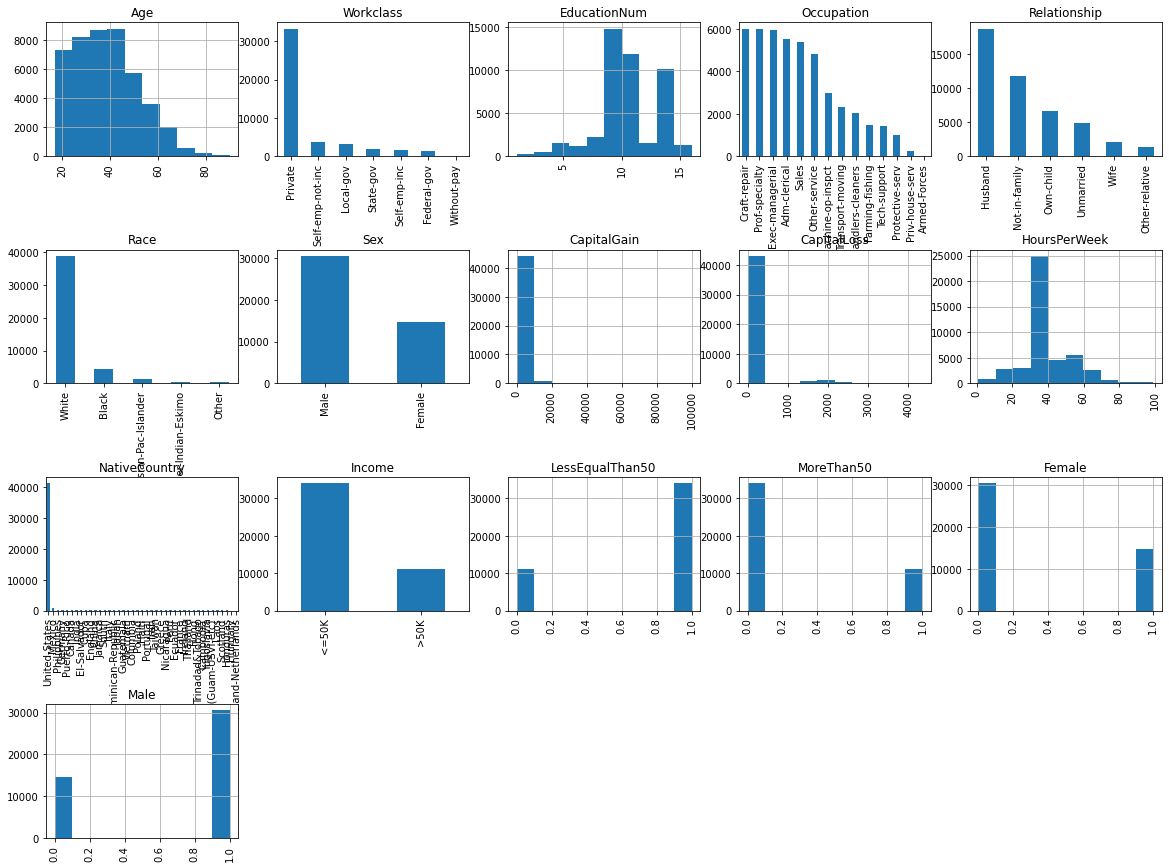

In [287]:
fig = plt.figure(figsize=(20,15))
cols = 5
rows = np.ceil(float(cc.shape[1]) / cols)
for i, column in enumerate(cc.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if cc.dtypes[column] == np.object:
        cc[column].value_counts().plot(kind="bar", axes=ax)
    else:
        cc[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

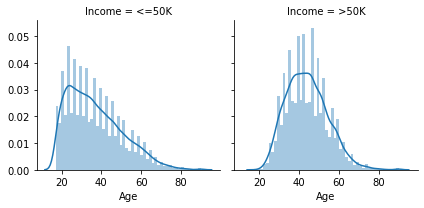

In [288]:
# Explore Age vs Income
g = sns.FacetGrid(cc, col='Income')
g = g.map(sns.distplot, "Age")
plt.show()

In [289]:
# Correlation matrix between numerical values
g = sns.heatmap(cc[numeric_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

NameError: name 'numeric_features' is not defined

In [ ]:
display(cc.corr())

In [294]:
# Exploring
printmd('## Relationship by Gender')
cc[["Sex", "Relationship"]].head(5)

## Relationship by Gender

,Sex,Relationship
0,Male,Not-in-family
1,Male,Husband
2,Male,Not-in-family
3,Male,Husband
4,Female,Wife


## Age vs Income

The higher average age tends to make more than 50k.         In both cases, males have higher income than women.        

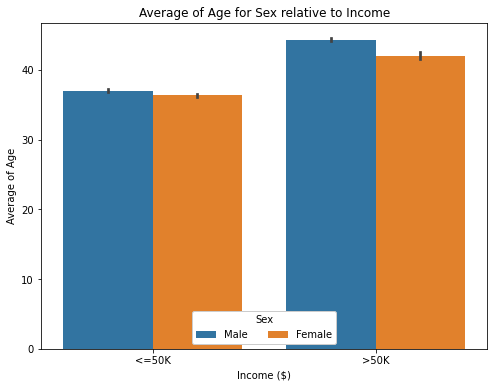

In [295]:
# Clustered Bar Chart 
printmd('## Age vs Income')
plt.figure(figsize=[8,6])
ax = sns.barplot(data = cc, x = 'Income', y = 'Age', hue = 'Sex')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Sex')
plt.title('Average of Age for Sex relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Age');
printmd('The higher average age tends to make more than 50k. \
        In both cases, males have higher income than women.\
        ')

## Education vs Income

Graph shows the proportion of income classes across years of education         As expected, the more years of education the better chances to earn more than 50K a yr        Now, who are the pleople of years 13-14 of education.

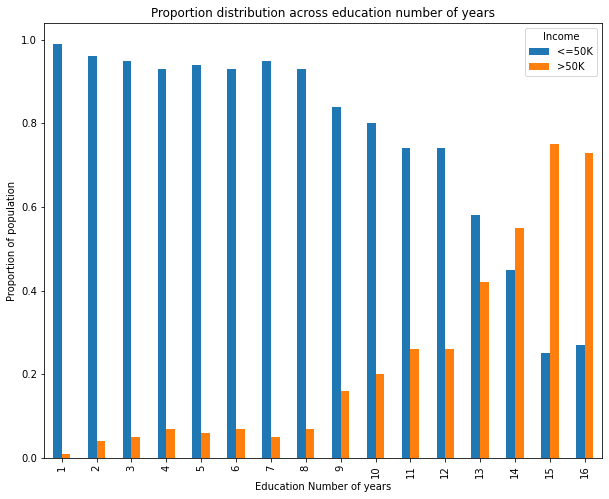

In [296]:
printmd('## Education vs Income')

EducationNum = round(pd.crosstab(cc.EducationNum, cc.Income).div(pd.crosstab(cc.EducationNum, cc.Income).apply(sum,1),0),2)

ax = EducationNum.plot(kind ='bar', title = 'Proportion distribution across education number of years', figsize = (10,8))
ax.set_xlabel('Education Number of years')
ax.set_ylabel('Proportion of population')

printmd('Graph shows the proportion of income classes across years of education \
        As expected, the more years of education the better chances to earn more than 50K a yr\
        Now, who are the pleople of years 13-14 of education.')

## Occupation vs Income

Graph shows Executive Managerial and Professional specialty occupations tend to earn more than 50K

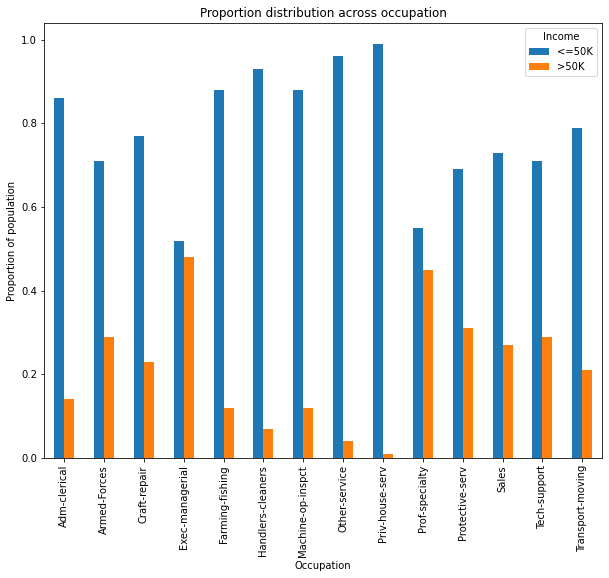

In [297]:
printmd('## Occupation vs Income')

Occupation = round(pd.crosstab(cc.Occupation, cc.Income).div(pd.crosstab(cc.Occupation, cc.Income).apply(sum,1),0),2)

ax = Occupation.plot(kind ='bar', title = 'Proportion distribution across occupation', figsize = (10,8))
ax.set_xlabel('Occupation')
ax.set_ylabel('Proportion of population')

printmd('Graph shows Executive Managerial and Professional specialty occupations tend to earn more than 50K')

## Gender vs Income

Women make less than man. Maybe this data is skewed towards man in executive positions and women in other          positions that guarantee to make less than 50K?

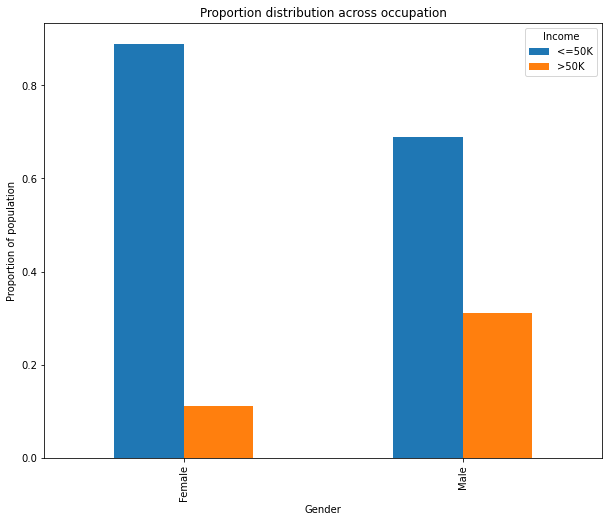

In [298]:
printmd('## Gender vs Income')

Sex = round(pd.crosstab(cc.Sex, cc.Income).div(pd.crosstab(cc.Sex, cc.Income).apply(sum,1),0),2)

ax = Sex.plot(kind ='bar', title = 'Proportion distribution across occupation', figsize = (10,8))
ax.set_xlabel('Gender')
ax.set_ylabel('Proportion of population')

printmd('Women make less than man. Maybe this data is skewed towards man in executive positions and women in other \
         positions that guarantee to make less than 50K?')

## Proportion distribution across gender for each workclass

Income between men and women making more than 50K

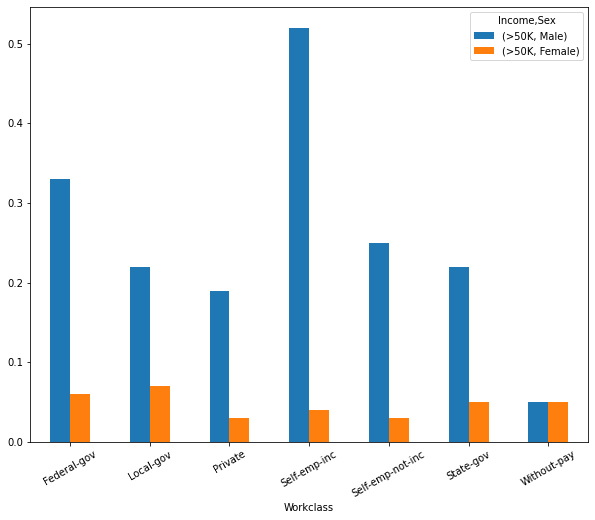

In [303]:
printmd('## Proportion distribution across gender for each workclass')
Gender_workclass = round(pd.crosstab(cc.Workclass, [cc.Income, cc.Sex]).div(pd.crosstab(cc.Workclass, [cc.Income, cc.Sex]).apply(sum,1),0),2)
Gender_workclass[[('>50K','Male'), ('>50K','Female')]].plot(kind = 'bar', title = '', figsize = (10,8), rot = 30)
ax.set_xlabel('Gender')
ax.set_ylabel('Proportion of population')

printmd('Income between men and women making more than 50K')

## Education years by Gender

Males tend to have higher education

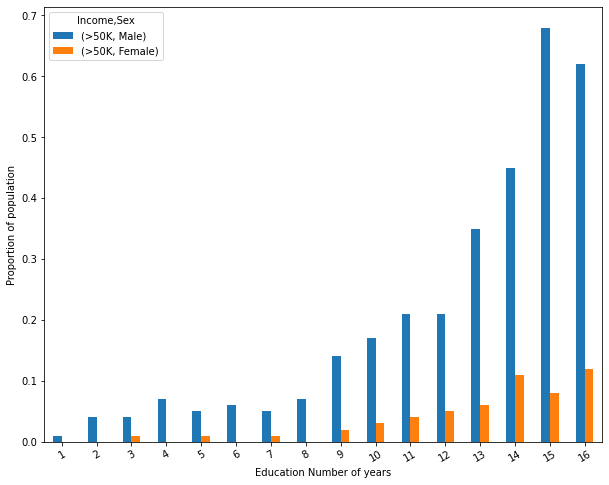

In [311]:
printmd('## Education years by Gender')
EducationNum2 = round(pd.crosstab(cc.EducationNum, [cc.Income, cc.Sex]).div(pd.crosstab(cc.EducationNum, cc.Sex).apply(sum,1),0),2)

ax = EducationNum2[[('>50K','Male'), ('>50K','Female')]].plot(kind = 'bar', title = '', figsize = (10,8), rot = 30)
ax.set_xlabel('Education Number of years')
ax.set_ylabel('Proportion of population')

printmd('Males tend to have higher education')

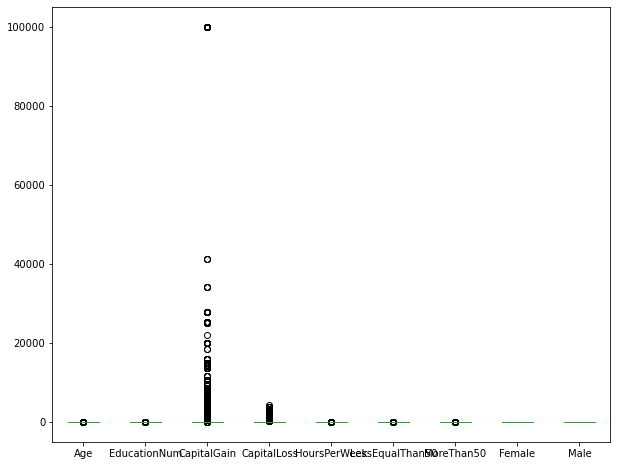

In [312]:
# Outliers
cc.select_dtypes(exclude = 'category').plot(kind = 'box', figsize = (10,8))

# V	Fitting an ML Model

### Dummy encode the dataset

In [313]:
# Drop Income and Sex because it is represented in dummy coded columns
# cc dataset without the columns Income and Sex becomes cc_data
cc_data = cc.drop(columns = ['Income','Sex'])

In [314]:
cc_data.head(1)

,Age,Workclass,EducationNum,Occupation,Relationship,Race,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,LessEqualThan50,MoreThan50,Female,Male
0,39,State-gov,13,Adm-clerical,Not-in-family,White,2174,0,40,United-States,1,0,0,1


In [316]:
# Check data type
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              45222 non-null  int64 
 1   Workclass        45222 non-null  object
 2   EducationNum     45222 non-null  int64 
 3   Occupation       45222 non-null  object
 4   Relationship     45222 non-null  object
 5   Race             45222 non-null  object
 6   CapitalGain      45222 non-null  int64 
 7   CapitalLoss      45222 non-null  int64 
 8   HoursPerWeek     45222 non-null  int64 
 9   NativeCountry    45222 non-null  object
 10  LessEqualThan50  45222 non-null  uint8 
 11  MoreThan50       45222 non-null  uint8 
 12  Female           45222 non-null  uint8 
 13  Male             45222 non-null  uint8 
dtypes: int64(5), object(5), uint8(4)
memory usage: 5.2+ MB


In [317]:
# Create dummy variables
cc_data_1hot = pd.get_dummies(cc_data)

In [321]:
# Check data type, all should be numeric
cc_data_1hot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 82 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   Age                                       45222 non-null  int64
 1   EducationNum                              45222 non-null  int64
 2   CapitalGain                               45222 non-null  int64
 3   CapitalLoss                               45222 non-null  int64
 4   HoursPerWeek                              45222 non-null  int64
 5   LessEqualThan50                           45222 non-null  uint8
 6   MoreThan50                                45222 non-null  uint8
 7   Female                                    45222 non-null  uint8
 8   Male                                      45222 non-null  uint8
 9   Workclass_Federal-gov                     45222 non-null  uint8
 10  Workclass_Local-gov                       45222 non-null  

In [322]:
encoded = list(cc_data_1hot.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

82 total features after one-hot encoding.


## Split the Dataset

In [323]:
# Partioning the data
X = cc_data_1hot.drop('MoreThan50', axis=1)
y = cc_data_1hot['MoreThan50']


In [324]:
X = X.drop('LessEqualThan50', axis=1)

In [325]:
# Splitting to training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)

## Model Development

### Dummy Classifier 

In [326]:
dummy = DummyClassifier(strategy = 'most_frequent', random_state=0)
dummy.fit(X_train, y_train)

#To get prediction on X

ydummy_train = dummy.predict(X_train)
ydummy_train[0:5]

#To get prediction on y
ydummy_test = dummy.predict(X_test)
print ('Confusion matrix for DummyClassifier is : \n \n', confusion_matrix(y_test,ydummy_test))


Confusion matrix for DummyClassifier is : 
 
 [[6745    0]
 [2300    0]]


In [327]:
##Accuracy of dummy classifier ( #so most Machine learning model should do better than this.)
print ('Accuracy score for DummyClassifier is : \n \n', accuracy_score(y_test, ydummy_test))

Accuracy score for DummyClassifier is : 
 
 0.7457158651188502


In [328]:
# Import classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

# Import functions
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings("ignore")

In [329]:
models = {}

# models with default parameter
models['LogisticRegression'] = LogisticRegression()
models['RandomForest'] = RandomForestClassifier()
models['AdaBoost'] = AdaBoostClassifier()

In [330]:
# Cross validation
for model_name in models:
    model = models[model_name]
    results = cross_validate(model, X, y, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)
    
    print(model_name + ":")
    print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
    print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())
    print("---------------------------------------------------------")

LogisticRegression:
Accuracy: train:  0.8301435786735818 | test:  0.8316967719268907
F1-score: train:  0.6120319224211215 | test:  0.6151176056864084
---------------------------------------------------------
RandomForest:
Accuracy: train:  0.9717836450621791 | test:  0.8449426830171713
F1-score: train:  0.9422360312969411 | test:  0.6671072275070316
---------------------------------------------------------
AdaBoost:
Accuracy: train:  0.8580447618711566 | test:  0.8569503238146092
F1-score: train:  0.6810413274790501 | test:  0.6783695597890371
---------------------------------------------------------


In [334]:
printmd('Models Definitions: Logistic regression, despite its name, is a linear model for classification rather than regression. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function. A Random forest is a meta estimator that fits several decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.')


Models Definitions: Logistic regression, despite its name, is a linear model for classification rather than regression. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function. A Random forest is a meta estimator that fits several decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

### Logistic Regression

In [375]:
logr = LogisticRegression(solver='lbfgs', class_weight="balanced")
lr = logr.fit(X_train,y_train)
ypred_train_logr = logr.predict(X_train)
ypred_test_logr = logr.predict(X_test)

In [376]:
print ('First 8 Predictions for training data are: ', ypred_train_logr[:8])
print ('First 8 Predictions for test data are: ', ypred_test_logr[:8])


First 8 Predictions for training data are:  [0 1 0 1 0 0 0 0]
First 8 Predictions for test data are:  [1 0 0 0 0 0 0 0]


In [377]:
print ('confusion matrix for training data is : \n', confusion_matrix(y_train,ypred_train_logr), '\n', '\n')
print ('confusion_matrix for test data is : \n', confusion_matrix(y_test,ypred_test_logr), '\n')


confusion matrix for training data is : 
 [[21550  5719]
 [ 1856  7052]] 
 

confusion_matrix for test data is : 
 [[5452 1293]
 [ 480 1820]] 



In [378]:
#comm='''
#ACCURACY,RECALL PRECISION (TRAINING DATA)
print ('Accuracy for train data is : \n', accuracy_score(y_train,ypred_train_logr), '\n')
print ('Recall for train data is : \n', recall_score(y_train,ypred_train_logr), '\n')
print ('Precision for train data is : \n', precision_score(y_train,ypred_train_logr), '\n')
print ('f1-score for train data is : \n', f1_score(y_train,ypred_train_logr), '\n')

#pos_label=1 need to define***
#'''

Accuracy for train data is : 
 0.7906128203001908 

Recall for train data is : 
 0.7916479568926807 

Precision for train data is : 
 0.5521885521885522 

f1-score for train data is : 
 0.6505835139997233 



### Predicting Probability 

In [379]:
yprob_test_logr = logr.predict_proba(X_test) #just seeign the probabilities as it is
yprob_test_logr[0:9,:].round(3) # Probabilities that the target variable is 0, 1 coz of x and y in the curve

array([[0.176, 0.824],
       [0.685, 0.315],
       [0.805, 0.195],
       [0.552, 0.448],
       [0.593, 0.407],
       [0.602, 0.398],
       [0.578, 0.422],
       [0.954, 0.046],
       [0.949, 0.051]])

###  Threshold Scores

In [380]:
print ('Scores for threshold value of: ', 0.5, '\n')
print ('Accuracy for test data is : \n', accuracy_score(y_test,yprob_test_logr[:,1] > 0.2), '\n')
print ('Recall for test data is : \n', recall_score(y_test,yprob_test_logr[:,1] > 0.2), '\n')
print ('Precision for test data is : \n', precision_score(y_test,yprob_test_logr[:,1] > 0.2), '\n')
print ('f1 score for test data is : \n', f1_score(y_test,yprob_test_logr[:,1] > 0.2), '\n')


Scores for threshold value of:  0.5 

Accuracy for test data is : 
 0.6403537866224434 

Recall for test data is : 
 0.9678260869565217 

Precision for test data is : 
 0.411840888066605 

f1 score for test data is : 
 0.5778066190785204 



## ROC Curve

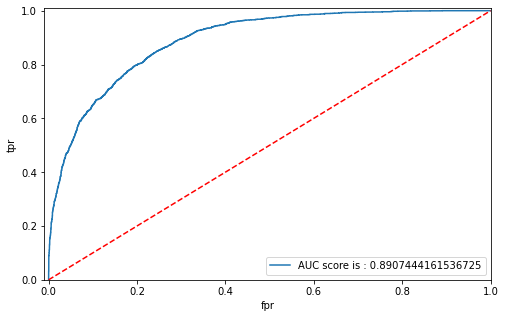

AUC Score for logistic regression is 0.8907444161536725


In [386]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

fpr_logr, tpr_logr,_ = roc_curve(y_test,yprob_test_logr[:,1])
auc_logr = auc(fpr_logr, tpr_logr)

fig = plt.figure(figsize = (8,5))

plt.plot(fpr_logr,tpr_logr, label = 'AUC score is : ' + str(auc_logr))
plt.xlabel('fpr', fontsize = 10)
plt.ylabel('tpr', fontsize = 10)
plt.xlim([-0.01,1])
plt.ylim([0,1.01])
plt.legend()

plt.plot([0,1],[0,1],'r--')
plt.show()

print ('AUC Score for logistic regression is', roc_auc_score(y_test,yprob_test_logr[:,1]))

# VI Features Importance

In [336]:
from sklearn.preprocessing import LabelEncoder

In [362]:
cens_conc = cc_data.copy()

In [363]:
for col in cens_conc.columns:
    if cens_conc[col].dtypes == 'object':
        encoder = LabelEncoder()
        cens_conc[col] = encoder.fit_transform(cens_conc[col])

In [364]:
# Partioning the data
Xc = cens_conc.drop('MoreThan50', axis=1)
yc = cens_conc['MoreThan50']

In [365]:
# Partioning the data
Xc = Xc.drop('LessEqualThan50', axis=1)

In [366]:
# Splitting to training and testing
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2, random_state=42)

In [367]:
clf = RandomForestClassifier()
clf.fit(Xc_train, yc_train)


# View a list of the features and their importance scores
print('\nFeatures Importance:')
feat_imp = pd.DataFrame(zip(Xc.columns.tolist(), clf.feature_importances_ * 100), columns=['feature', 'importance'])
feat_imp


Features Importance:


,feature,importance
0,Age,23.076484
1,Workclass,4.840972
2,EducationNum,13.513706
3,Occupation,8.291798
4,Relationship,15.792242
5,Race,1.737237
6,CapitalGain,12.981473
7,CapitalLoss,4.314648
8,HoursPerWeek,11.384345
9,NativeCountry,2.054252


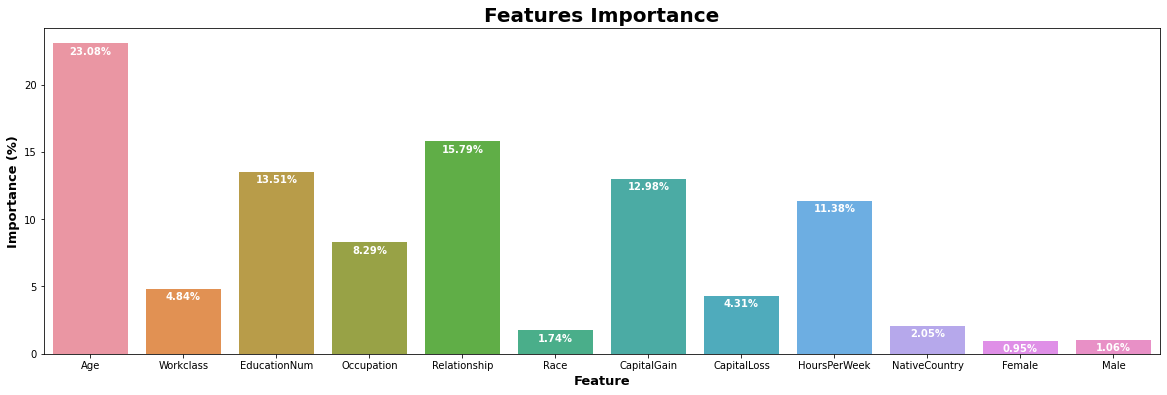

In [368]:
# Features importance plot
plt.figure(figsize=[20,6])
sns.barplot(data=feat_imp, x='feature', y='importance')
plt.title('Features Importance', weight='bold', fontsize=20)
plt.xlabel('Feature', weight='bold', fontsize=13)
plt.ylabel('Importance (%)', weight='bold', fontsize=13);


# add annotations
impo = feat_imp['importance']
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    count = impo[loc]
    pct_string = '{:0.2f}%'.format(count)

    plt.text(loc, count-0.8, pct_string, ha = 'center', color = 'w', weight='bold')